In [7]:
import os
os.chdir("/home/victorhuang/projects/gtx/")
import mat73
import pandas as pd
from tqdm import tqdm
import numpy as np
from scipy import io as sio

In [8]:
def load_split_data(file_path):
    data = sio.loadmat(file_path)
    
    data = {k: v for k, v in data.items() if not k.startswith('__')}

    splits = ['train', 'val', 'test']
    data_by_split = {split: {} for split in splits}

    for key, value in data.items():
        for split in splits:
            if key.startswith(split + '_'):
                field = key[len(split) + 1:]
                data_by_split[split][field] = value

    return data_by_split

In [9]:
data = load_split_data("data/20250822_mcx_sujit_100scale_splited.mat")

In [10]:
data['train']['optical_props'].shape

(8000, 101, 101, 2)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_img(data, type='depth'):

    if type == 'fluorescence' or type == 'reflectance':
        fig, axs = plt.subplots(1, 6, figsize=(10, 5))
        for i in range(6):
            axs[i].imshow(data[...,i], cmap='hot', interpolation='nearest')
            axs[i].axis('off')
        plt.show()
    elif type == 'optical_props':
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(data[:, :, 0], cmap='hot', interpolation='nearest')
        axs[0].set_title('mu_a')
        axs[0].axis('off')
        axs[1].imshow(data[:, :, 1], cmap='hot', interpolation='nearest')
        axs[1].set_title('mu_sp')
        axs[1].axis('off')
        plt.show()
    elif type == 'depth':
        plt.imshow(data, cmap='hot', interpolation='nearest')
        plt.colorbar()
        plt.show()
    else:
        plt.imshow(data, cmap='hot', interpolation='nearest')
        plt.colorbar()
        plt.show()

def draw_hist(data, type):
    if type == 'fluorescence':
        fig, axs = plt.subplots(1, 6, figsize=(10,5))
        for i in range(6):
            axs[i].hist(data[...,i].ravel(), bins=100, color='green', edgecolor='black')
            axs[i].set_title(f'Channel {i+1}')
        plt.show()
    elif type == 'depth':
        plt.hist(data.ravel(), bins=100, color='green', edgecolor='black')
        plt.show()

def get_stats(data):
    draw_img(data['fluorescence'], type='fluorescence')
    draw_img(data['op'], type='optical_props')
    draw_img(data['depth'], type='depth')

    draw_hist(data['fluorescence'], type='fluorescence')
    draw_hist(data['depth'], type='depth')

112


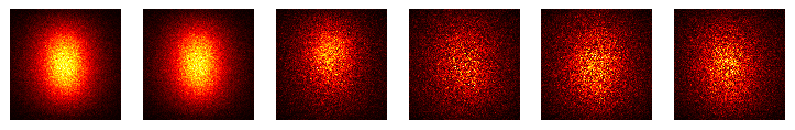

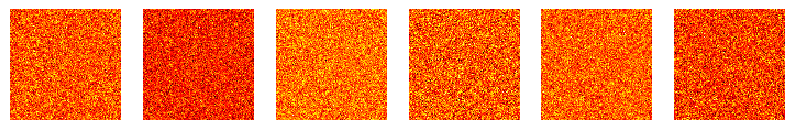

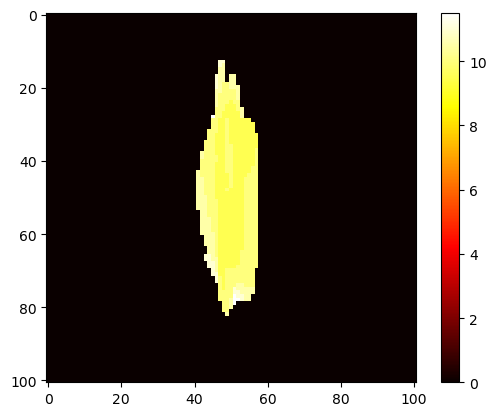

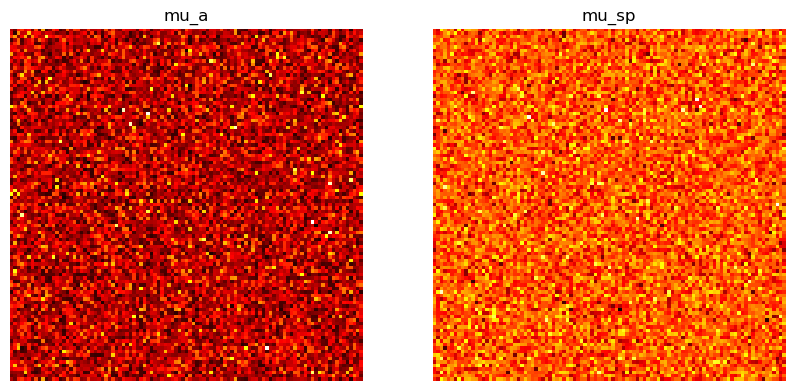

313


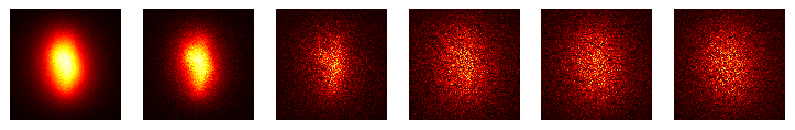

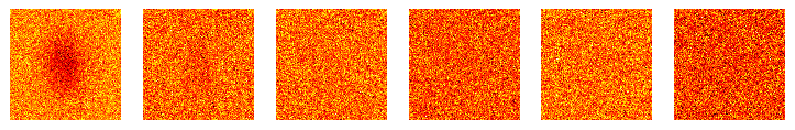

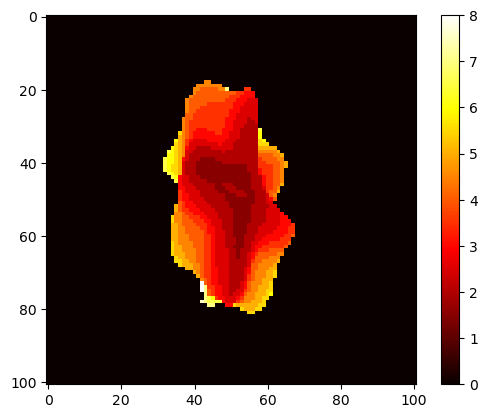

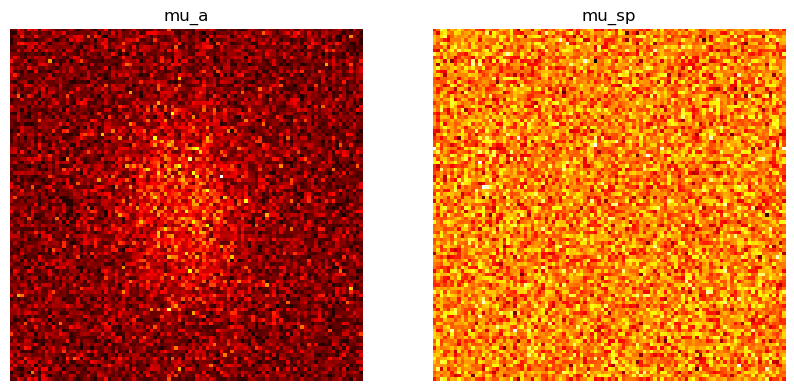

712


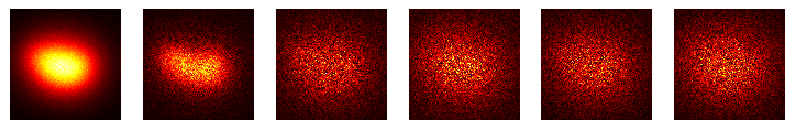

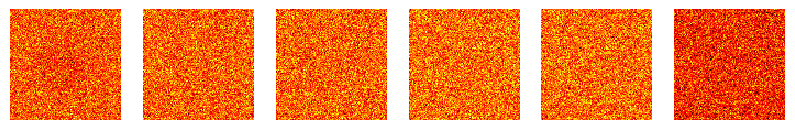

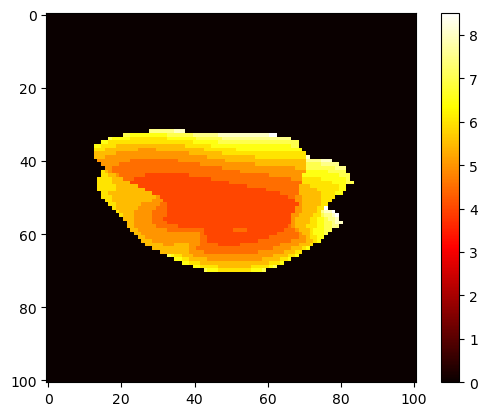

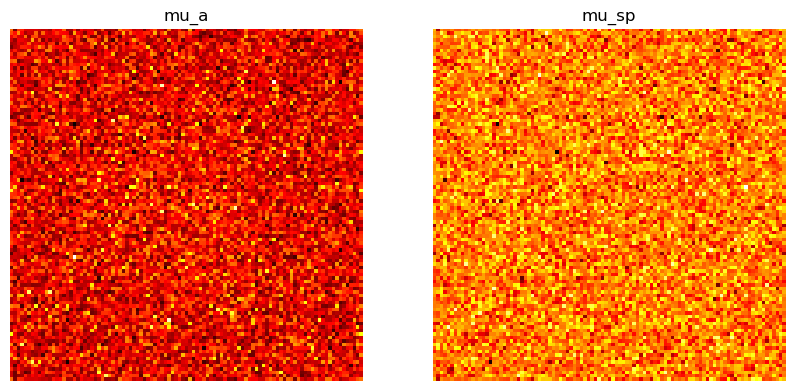

3746


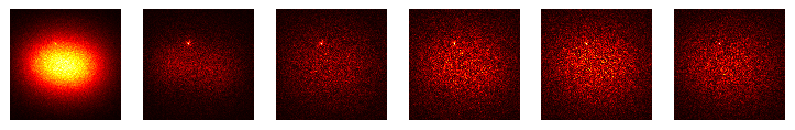

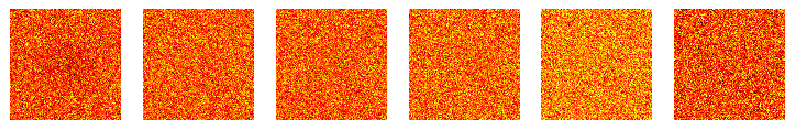

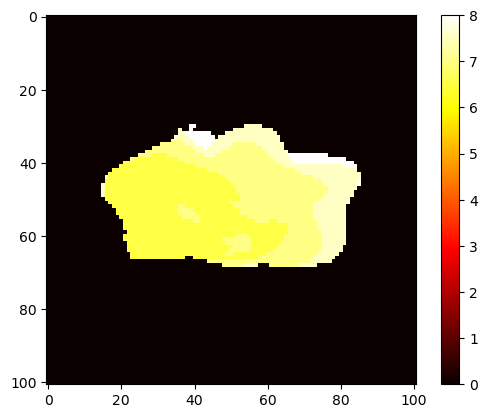

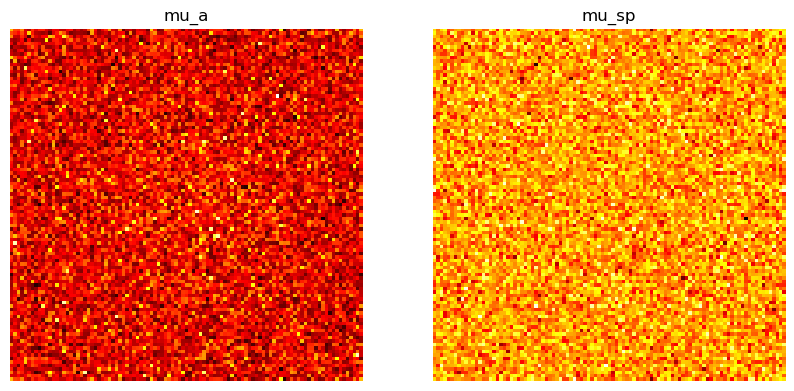

5921


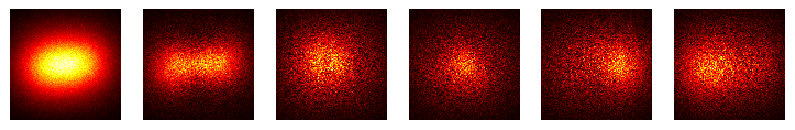

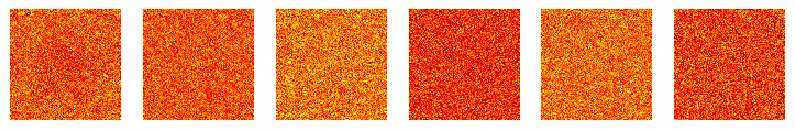

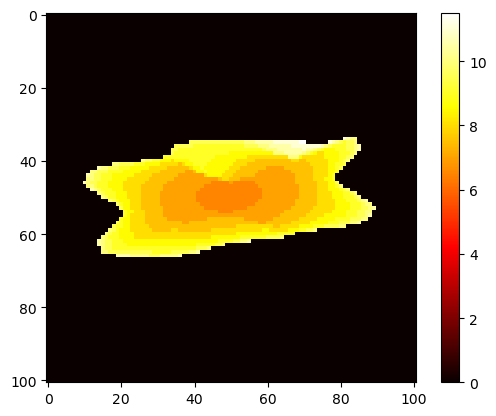

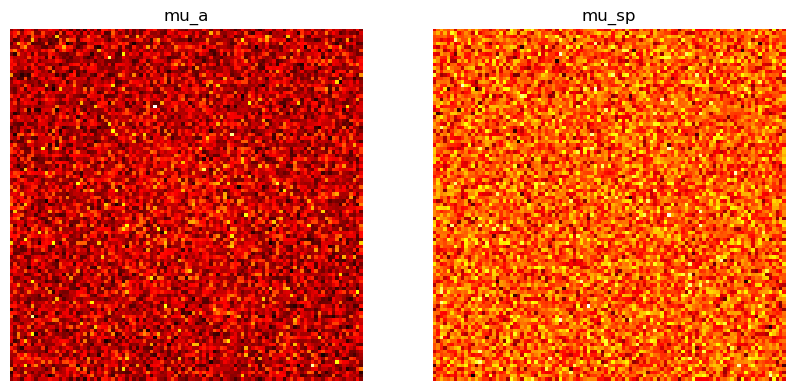

In [38]:
for i in range(len(data['train']['fluorescence'])):
    if np.mean(data['train']['optical_props'][i, ...]) > 0.0:
        print(i)
        draw_img(data['train']['fluorescence'][i, ...], type='fluorescence')
        draw_img(data['train']['reflectance'][i, ...], type='reflectance')
        draw_img(data['train']['depth'][i, ...], type='depth')
        draw_img(data['train']['optical_props'][i, ...], type='optical_props')
        


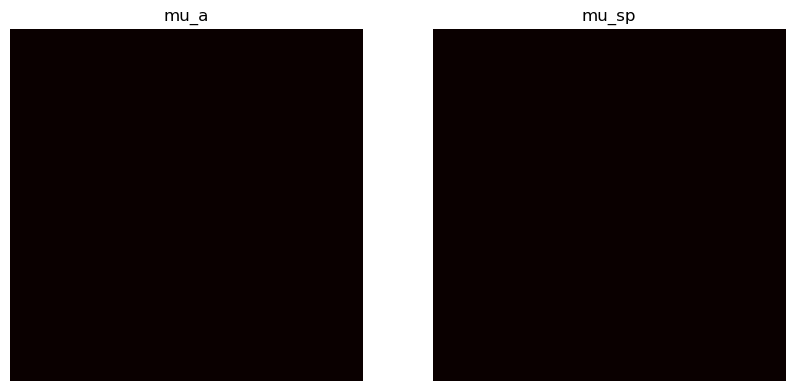

In [35]:
sample_idx = 100
sample = {
    'fluorescence': data['train']['fluorescence'][sample_idx, ...],
    'reflectance': data['train']['reflectance'][sample_idx, ...],
    'depth': data['train']['depth'][sample_idx, ...],
    'optical_props': data['train']['optical_props'][sample_idx, ...],
    'concentration_fluor': data['train']['concentration_fluor'][sample_idx, ...]
}
draw_img(sample['optical_props'], type='optical_props')


In [29]:
sample['fluorescence'].shape

(101, 101, 6)

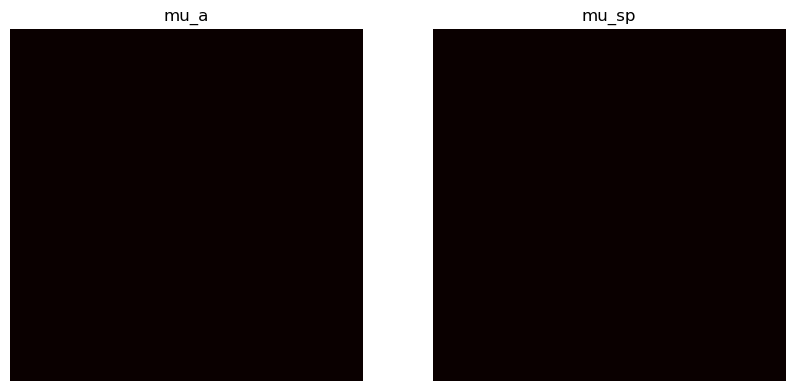

In [18]:
print(np.min(data['train']['optical_props'][50,...,0]))
print(np.max(data['train']['optical_props'][50,...,0]))
print(np.mean(data['train']['optical_props'][50,...,0]))


0.0
0.0
0.0
